# Notebook Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #Color map

from sympy import symbols, diff

%matplotlib inline

# Example 1

## $f(x)= x^2 + x + 1$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
#Make Data
x_1 = np.linspace(start=-3,stop=3,num=100)

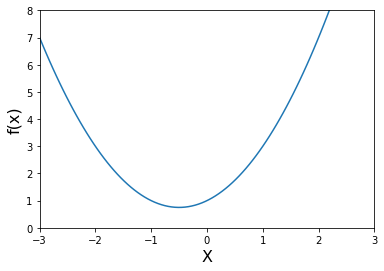

In [5]:
#Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

# Slope and Derivatives

In [6]:
def df(x):
    return 2*x + 1

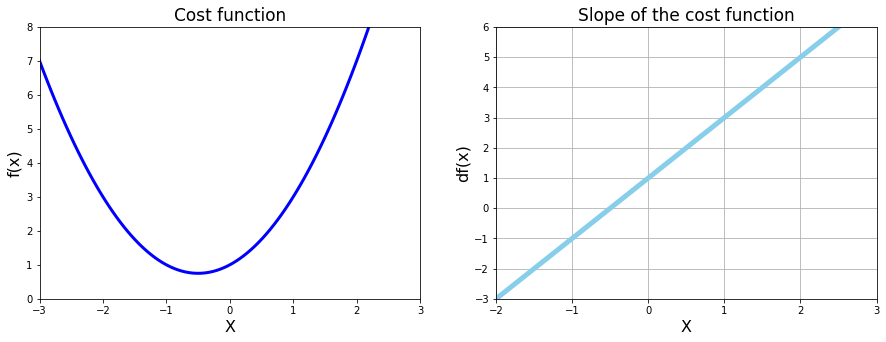

In [7]:
#Plot function and derivative side by side
plt.figure(figsize=[15,5])
#Chart1: Cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

#Chart2: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1, df(x_1),color='skyblue',linewidth=5)
plt.show()

# Gradient Descent

In [8]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]
for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if(step_size < precision):
        break
print('Local minimum occurs at: ',new_x)
print('Slope or df(x) value at this point is : ',df(new_x))
print('f(x) value or cost at this point is : ',f(new_x))

Local minimum occurs at:  -0.49962781616118024
Slope or df(x) value at this point is :  0.0007443676776395236
f(x) value or cost at this point is :  0.7500001385208099


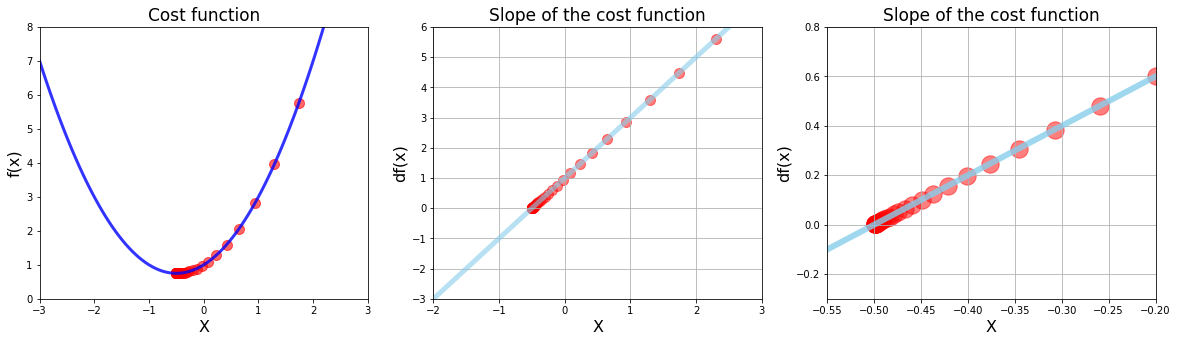

In [9]:
#Superimpose the gradient descent calculations on plot
plt.figure(figsize=[20,5])
#Chart1: Cost function
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3,alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100, alpha=0.6 )

#Chart2: Derivative
plt.subplot(1,3,2)
plt.xlim([-2,3])
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1, df(x_1),color='skyblue',linewidth=5,alpha=0.6)
plt.scatter(x_list,slope_list,color='red',s=100, alpha=0.5 )


#Chart3: Derivative(CLose Up)
plt.subplot(1,3,3)
plt.xlim([-0.55,-0.2])
plt.ylim(-0.3,0.8)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1, df(x_1),color='skyblue',linewidth=6,alpha=0.8)
plt.scatter(x_list,slope_list,color='red',s=300, alpha=0.5 )
plt.show()

# Example 2: Multiple Minima vs Initial Guess

##  $g(x) = x^4 - 4x^2 + 5$

In [10]:
# Make some data
x_2 =  np.linspace(-2,2,1000)
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

    

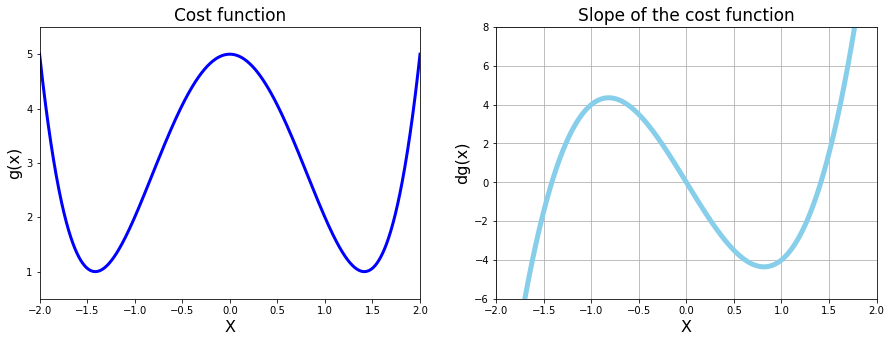

In [11]:
#Plot function and derivative side by side
plt.figure(figsize=[15,5])
#Chart1: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)

#Chart2: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.plot(x_2, dg(x_2),color='skyblue',linewidth=5)
plt.show()

## Gradient Descent as a python function

In [12]:
def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001,max_iter=500):
    #ctrl + ] for indenting the whole piece of code
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if(step_size < precision):
            break
    return new_x,x_list,slope_list

In [13]:
#shift+Tab after placing the curor on a function for knowing the signature of a function 
local_min,list_x,deriv_list = gradient_descent(derivative_func = dg,initial_guess = 0.5,
                                               multiplier = 0.01,precision = 0.001)
#This will also run  -  local_min,list_x,deriv_list = gradient_descent(derivative_func = dg,initial_guess = 0.5)
print('Local minimum occurs at: ',local_min)
print('Number of steps : ',len(list_x))


Local minimum occurs at:  1.4090774204884804
Number of steps :  42


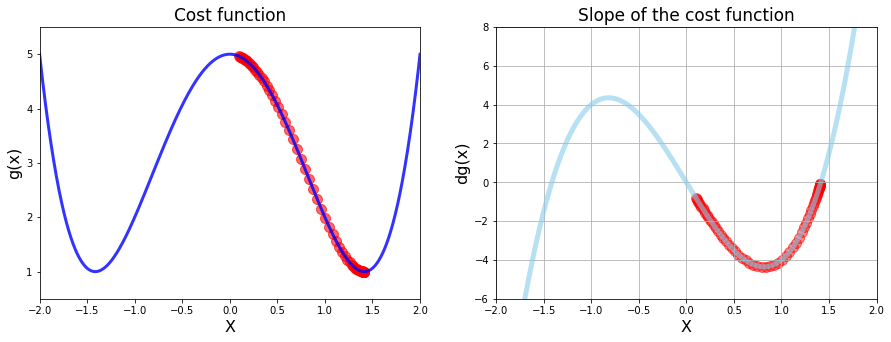

In [14]:
#Gradient descent fuinction 
local_min,list_x,deriv_list = gradient_descent(derivative_func = dg,initial_guess = 0.1,
                                               multiplier = 0.01,precision = 0.001)
#Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])
#Chart1: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)
#Chart2: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.plot(x_2, dg(x_2),color='skyblue',linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.show()

# Example 3: Divergence, Overflow and Python Tuples
## $h(x) = x ^ 5 - 2x^4 + 2$

In [15]:
# Make data 
x_3 = np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

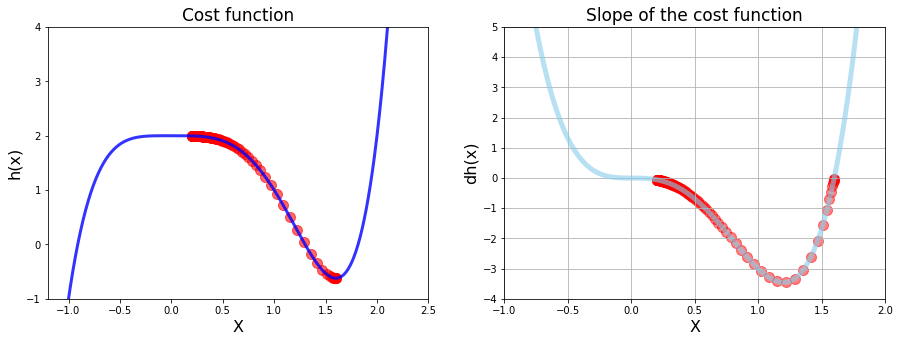

Local min occurs at:  1.5989534547394717
The cost at min is :  -0.6214287992331258
Number of steps :  117


In [16]:
#Gradient descent fuinction 
local_min,list_x,deriv_list = gradient_descent(derivative_func = dh,initial_guess = 0.2)
#For overflow error due to divergence, uncomment this
#local_min,list_x,deriv_list = gradient_descent(derivative_func = dh,initial_guess = 0.2)
#Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])
#Chart1: Cost function
plt.subplot(1,2,1)
plt.xlim([-1.2,2.5])
plt.ylim(-1,4)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('h(x)',fontsize=16)
plt.plot(x_3,h(x_3),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.6)
#Chart2: Derivative
plt.subplot(1,2,2)
plt.xlim([-1,2])
plt.ylim(-4,5)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dh(x)',fontsize=16)
plt.plot(x_3, dh(x_3),color='skyblue',linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.show()

print('Local min occurs at: ', local_min)
print('The cost at min is : ', h(local_min))
print('Number of steps : ', len(list_x))

## Python Tuples

In [17]:
#Tuple is vert similar to list
#Unlike list we can use tuple when we have different sorts of data(Not of the same type)
#We can't change a tuple after we make it Eg: myTuple[0]='d' will not be supported
#We also can't append values to a tuple
#Once we create a tuple, it's done
#Separted by a coma
myTuple = 'a','b','c'
numTuple = 5,6,7
mixedTyple = 1,4.5,'Test',True
singleValueTuple = 42,
print(myTuple[0])

a


## Learning rate 

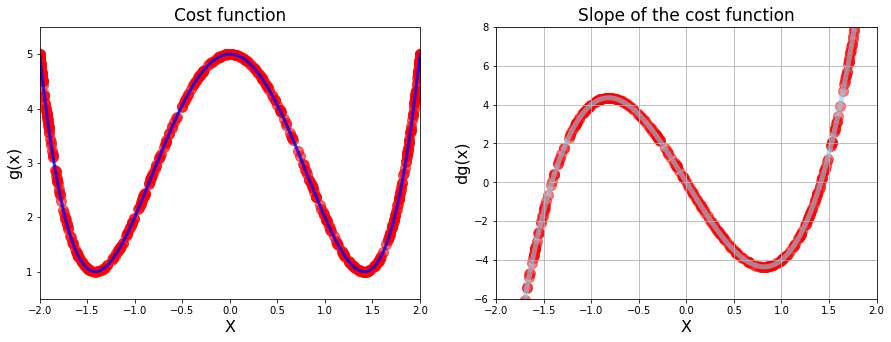

Number of steps:  501


In [18]:
#Gradient descent fuinction 
local_min,list_x,deriv_list = gradient_descent(derivative_func = dg,initial_guess = 1.9,
                                               multiplier = 0.25,precision = 0.001,max_iter=500)
#Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])
#Chart1: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)
#Chart2: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.plot(x_2, dg(x_2),color='skyblue',linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.show()
print('Number of steps: ',len(list_x))

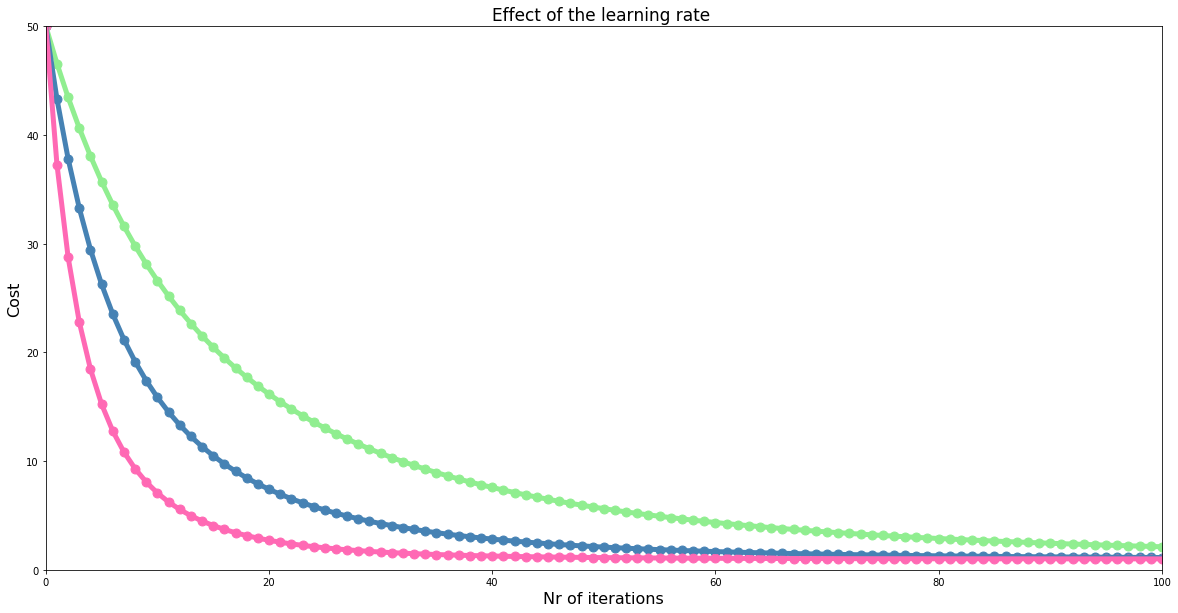

In [19]:
#Running GD 3 times 
n=100
low_gamma = gradient_descent(derivative_func = dg,initial_guess = 3,
                                               multiplier = 0.0005,precision = 0.0001,max_iter=n)
mid_gamma = gradient_descent(derivative_func = dg,initial_guess = 3,
                                               multiplier = 0.001,precision = 0.0001,max_iter=n)
high_gamma = gradient_descent(derivative_func = dg,initial_guess = 3,
                                               multiplier = 0.002,precision = 0.0001,max_iter=n)
#Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])
#Chart1: Cost function
plt.xlim([0,n])
plt.ylim(0,50)
plt.title('Effect of the learning rate ',fontsize=17)
plt.xlabel('Nr of iterations',fontsize=16)
plt.ylabel('Cost',fontsize=16)
#Values for our charts 
#1) Y axis data : Convert the list to numpy arrays 
low_values = np.array(low_gamma[1])

#2) X axis data: Create a list from 0 to n+1
iteration_list = list(range(0,n+1))
#plotting low learning rate
plt.plot(iteration_list,g(low_values),color='lightgreen',linewidth=5)
plt.scatter(iteration_list,g(low_values),color='lightgreen',s=80)

#plotting mid learning rate
plt.plot(iteration_list,g(np.array(mid_gamma[1])),color='steelblue',linewidth=5)
plt.scatter(iteration_list,g(np.array(mid_gamma[1])),color='steelblue',s=80)

#plotting high learning rate
plt.plot(iteration_list,g(np.array(high_gamma[1])),color='hotpink',linewidth=5)
plt.scatter(iteration_list,g(np.array(high_gamma[1])),color='hotpink',s=80)

plt.show()

# Example 4: Data Viz with 3D Charts

## Minimize $f(x,y) = \frac{1}{3^{-x^2 -y^2} + 1}$

## (OR)

## Minimize $f(x,y) = \frac{1}{r + 1}$ where $r$ is $3^{-x^2 - y^2}$

In [20]:
def f(x,y):
    r= 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [21]:
#Make our x and y data 
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)

#The linspace function returns the type ndarray 
print('Shape of X array ',x_4.shape) #This shape is also called as Vector(1D)

#So we are converting this ndarray to 2D ararys beacuse later we need it while plotting
x_4,y_4 = np.meshgrid(x_4,y_4)
print('Shape of X array ',x_4.shape)#Now it is 2D array

Shape of X array  (200,)
Shape of X array  (200, 200)


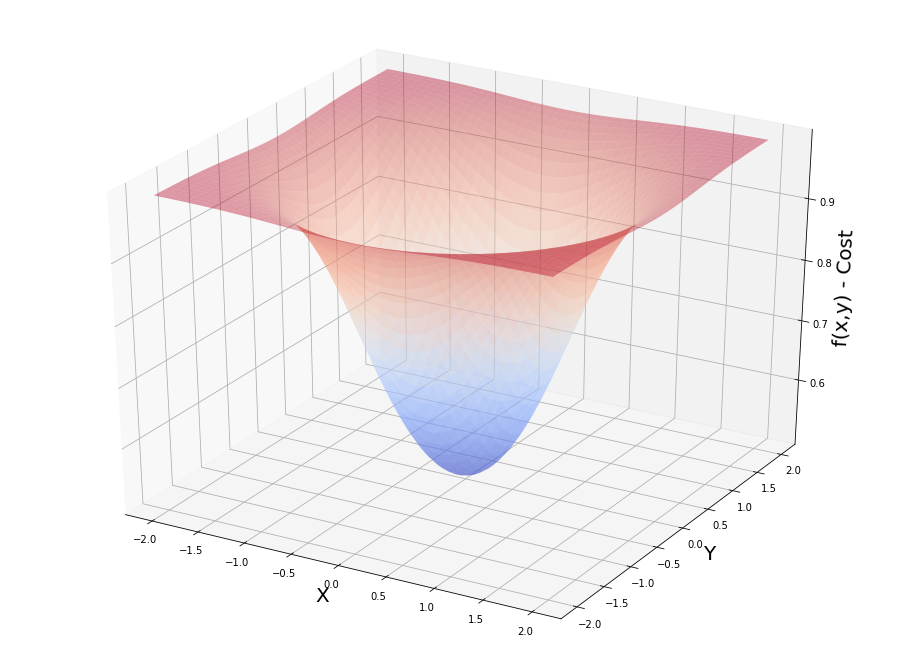

In [22]:
#Genrating 3D plot 
#A figure is a matplot lib objetect used to manipulate our chart(Like a container which consists of other smaller components)
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')#gca = get current axes

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y) - Cost',fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

# Partial Derivatives and Symbolic Computations

In [24]:
a,b = symbols('x,y')
print('Our cost function f(x,y) is: ',f(a,b))
diff(f(a,b),a) #We are differentiating the cost function with respect to x, so a is the second argument
print('Partial derivative wrt x is: ',diff(f(a,b),a))
#Now let's evaluate the functions with the values which we generated
#Eg:
print('Value of f(x,y) at x=1.8 and y = 1.0 is : ',
      f(a,b).evalf(subs={a:1.8,b:1.0})) #This a and b is given together by using Python Dictionary 
print('Slope or partial derivative df(x,y) at x=1.8 and y = 1.0 wrt x is : ',
      diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 and y = 1.0 is :  0.990604794032582
Slope or partial derivative df(x,y) at x=1.8 and y = 1.0 wrt x is :  0.0368089716197505
